## Position of a quasar

### Part 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the true position is $\mu = 1$ (in suitable units) and the erorrs are $\sigma=0.2$

In [6]:
N = int(10)
mu = 1.
sigma = 0.2
x = np.random.normal(mu, sigma, N)
print(x)

[0.69598736 1.02529101 0.93815678 1.02170607 0.61407873 0.78620494
 1.23322181 0.83530625 0.79262095 0.70946426]


- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset  {𝑥𝑖} ). Make sure the x grid has enough points.

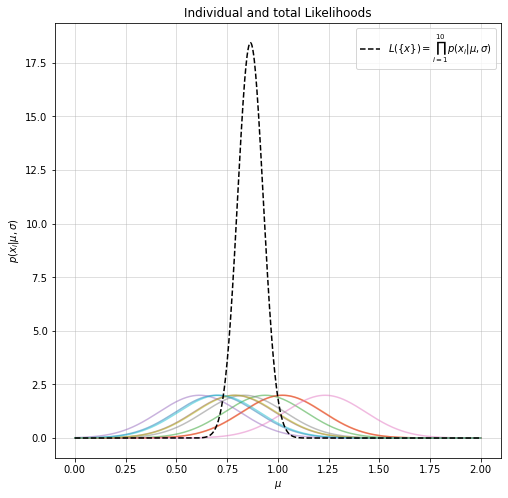

<Figure size 432x288 with 0 Axes>

In [7]:
x_len = int(1e3)
x_plot = np.linspace(0, 2, x_len)

pdfs = np.zeros((N, x_len))

fig, ax = plt.subplots(figsize=(8, 8))
for i in range(N):
    pdfs[i] = stats.norm.pdf(x_plot, x[i], sigma)
    plt.plot(x_plot, pdfs[i], alpha = 0.5)

tot_L = np.prod(pdfs, axis = 0)

plt.plot(x_plot, tot_L, ls='--', c='black', label=r'$L(\{x\}) = \prod_{i = 1}^{' +str(N)+'}{p(x_i|\mu,\sigma)}$')
plt.legend()
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('Individual and total Likelihoods')
plt.grid(alpha = 0.5)
plt.show()
plt.clf()


- Just read off the maximum likelihood solution (e.g. using `np.argmax`) 
- Compare it with the MLE estimator derived above

In [9]:
totL_max = np.argmax(tot_L)
print(totL_max)
max_value = x_plot[totL_max]
print("ML = " + str(max_value))

432
ML = 0.8648648648648649


In [10]:
ML_mu = np.mean(x)
print("mu = " + str(ML_mu))

mu = 0.8652038158726147


In [11]:
N_arr = np.arange(10, int(1e4), 100)

max_arr = np.zeros(len(N_arr))
ML_mu_arr = np.zeros(len(N_arr))

for i in range(len(N_arr)):
    tot_L_approx = 0
    x = np.random.normal(mu, sigma, N_arr[i])
    
    for j in range(N_arr[i]):
        tot_L_approx = tot_L_approx + np.log10(stats.norm.pdf(x_plot, x[j], sigma))
    max_arr[i] = x_plot[np.argmax(tot_L_approx)]
    ML_mu_arr[i] = np.mean(x)


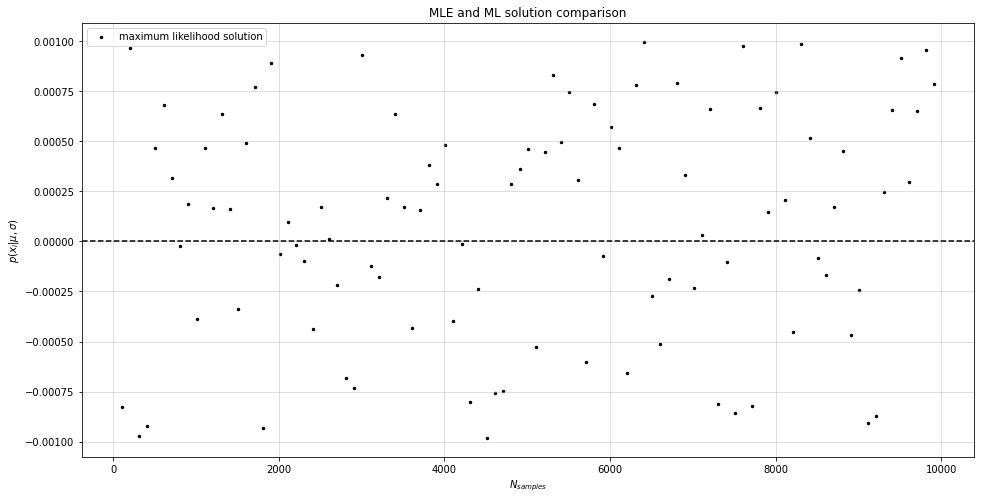

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.axhline(0, ls='--', c='black')
plt.scatter(N_arr[1:], (max_arr-ML_mu_arr)[1:], c='black', s = 6, label='maximum likelihood solution')
plt.legend()
plt.xlabel(r'$N_{samples}$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE and ML solution comparison')
plt.grid(alpha = 0.5)
plt.show()


### Part 2
Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

In [22]:
def FIM(tot_L):
    sec_der = np.diff(np.log(tot_L), 2)
    sec_der/= (x_plot[1]-x_plot[0])**2
    return((-sec_der[0])**(-1/2))

err_FIM = sigma/(N**(1/2))
print("Fisher Information matrix error = " + str(err_FIM))
print("Fisher Information matrix error on mean = " + str(FIM(tot_L)))

Fisher Information matrix error = 0.06324555320336758
Fisher Information matrix error on mean = 0.06324555320385156


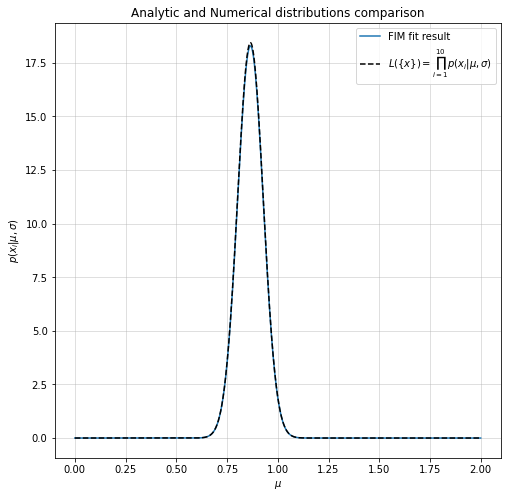

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x_plot, 2.9*stats.norm.pdf(x_plot, ML_mu, err_FIM), label = 'FIM fit result')
plt.plot(x_plot, tot_L, ls='--', c='black', label=r'$L(\{x\}) = \prod_{i = 1}^{' +str(N)+'}{p(x_i|\mu,\sigma)}$')
plt.legend()
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('Analytic and Numerical distributions comparison')
plt.grid(alpha = 0.5)
plt.show()
plt.clf()

### Part 3: Heteroscedastic uncertainties
- Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

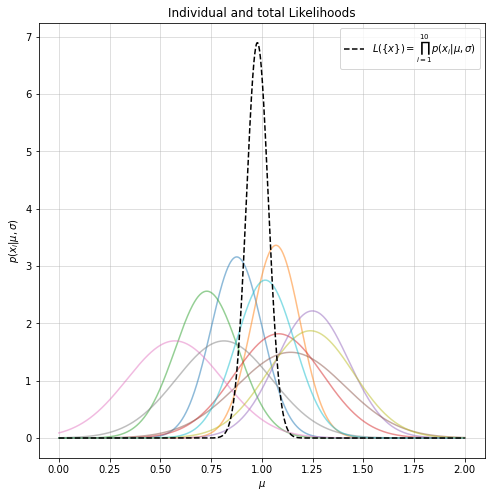

<Figure size 432x288 with 0 Axes>

In [29]:
N = 10
hetero_sigma = np.random.normal(0.2, 0.05, N)
hetero_x = np.zeros(N)
hetero_Ls = np.zeros((N, x_len))
for i in range(N):
    hetero_x[i] = np.random.normal(mu, hetero_sigma[i], 1)
    hetero_Ls[i] = stats.norm.pdf(x_plot, hetero_x[i], hetero_sigma[i])
    
tot_L = np.prod(hetero_Ls, axis = 0)

fig, ax = plt.subplots(figsize=(8, 8))
for i in range(N):
    plt.plot(x_plot, hetero_Ls[i], alpha = 0.5)

plt.plot(x_plot, tot_L, ls='--', c='black', label=r'$L(\{x\}) = \prod_{i = 1}^{' +str(N)+'}{p(x_i|\mu,\sigma)}$')
plt.legend()
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('Individual and total Likelihoods')
plt.grid(alpha = 0.5)
plt.show()
plt.clf()


In [32]:
ML_mu = np.mean(hetero_x)
print("Mean estimator= " + str(ML_mu))

totL_max = np.argmax(tot_L)
max_value = x_plot[totL_max]
print("Maximul likelihood = " + str(max_value))

Mean estimator= 0.9792035730628594
Maximul likelihood = 0.978978978978979


In [36]:
print("Fisher Information matrix error = " +  str((np.sum(1/hetero_sigma**2))**(-1/2)))
print("Fisher Information matrix error on mean = " + str(FIM(tot_L)))

Fisher Information matrix error = 0.05372096669815386
Fisher Information matrix error on mean = 0.05372096669800038


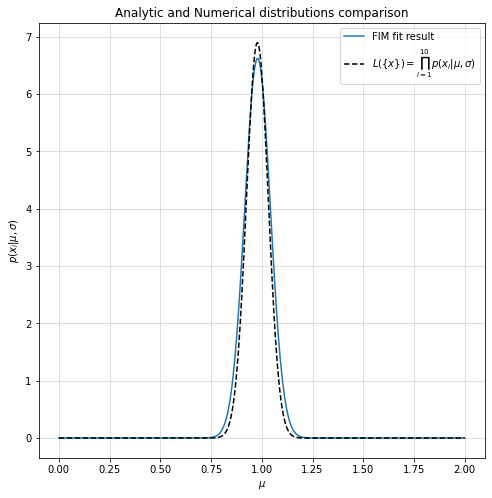

<Figure size 432x288 with 0 Axes>

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x_plot, 1.05*stats.norm.pdf(x_plot, ML_mu, err_FIM), label = 'FIM fit result')
plt.plot(x_plot, tot_L, ls='--', c='black', label=r'$L(\{x\}) = \prod_{i = 1}^{' +str(N)+'}{p(x_i|\mu,\sigma)}$')
plt.legend()
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('Analytic and Numerical distributions comparison')
plt.grid(alpha = 0.5)
plt.show()
plt.clf()